# affinity_propagation_CNN_clustering
- In [CNN_transfer_learning](./CNN_transfer_features.ipynb), we used a pre-trained convolutional neural network to generate a new feature set to better represent the galaxy images. These features were then compressed by a principal component analysis.
- In [kmeans_CNN_clustering](./kmeans_CNN_clustering.ipynb), we did a basic grouping into 10 clusters. Since there is not really a _good_ answer for how many clusters of galaxies we should have, so now lets try an algorithm that dictates the number of clusters.
- Affinity propagation works by finding 'exemplars' (i.e. prime examples for a representative group) through sending 'messages' between each of the samples. Here you define groups (or their exemplars) to minimise a certain metric (e.g. average distance between samples in the parameter space or variance). 
- Here we use output features corresponding to 37632 dimensions from the CNN (compressed to 100 by the PCA). 

In [10]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.cluster import AffinityPropagation
import cluster_evaluate

### Loading set of features 
- Also weights in case we want to manipulate feature space to rank pca components that best describe the variance in the data
- Several feature representations were generated, so selecting combination of output features from CNN and the number of features these were compressed to by the pca.

In [11]:
pca_feat = 20
cnn_feat = 128

features = np.load('./features/CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) + '_features.npy')
weights = np.load('./features/CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) + '_weights.npy')

plot_path = './cluster_plots/affinity_propagation/CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) +'/'
plot_path

'./cluster_plots/affinity_propagation/CNN-128_PCA-20/'

In [12]:
aff_prop = AffinityPropagation(damping=0.8)
# fit the model
aff_prop.fit(features)
# assign a cluster to each example
aff_prop_labels = aff_prop.predict(features)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


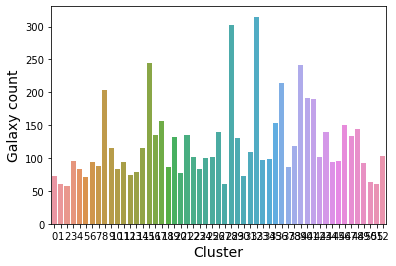

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x=aff_prop_labels, ax=ax)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Galaxy count', fontsize=14)

plt.savefig(plot_path + 'cluster_countplot.png', 
            format='png', 
            bbox_inches='tight', 
            dpi=200)

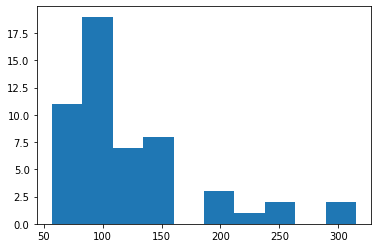

In [16]:
plt.hist(np.unique(aff_prop_labels, return_counts=True)[1]) ;

### Plotting galaxies in each cluster
- Loading in raw image data

In [6]:
data_dir = '../../sdss_CNN/data/cleaned_datasets/'
x = np.load(data_dir + 'x.npy')

In [17]:
for cl in np.unique(aff_prop_labels):
    cluster_evaluate.save_cluster_plot(images = x[aff_prop_labels == cl], 
                                       cluster_number = cl,
                                       cluster_total= np.max(aff_prop_labels) - 1,
                                       plot_path= plot_path) ;
    plt.close()

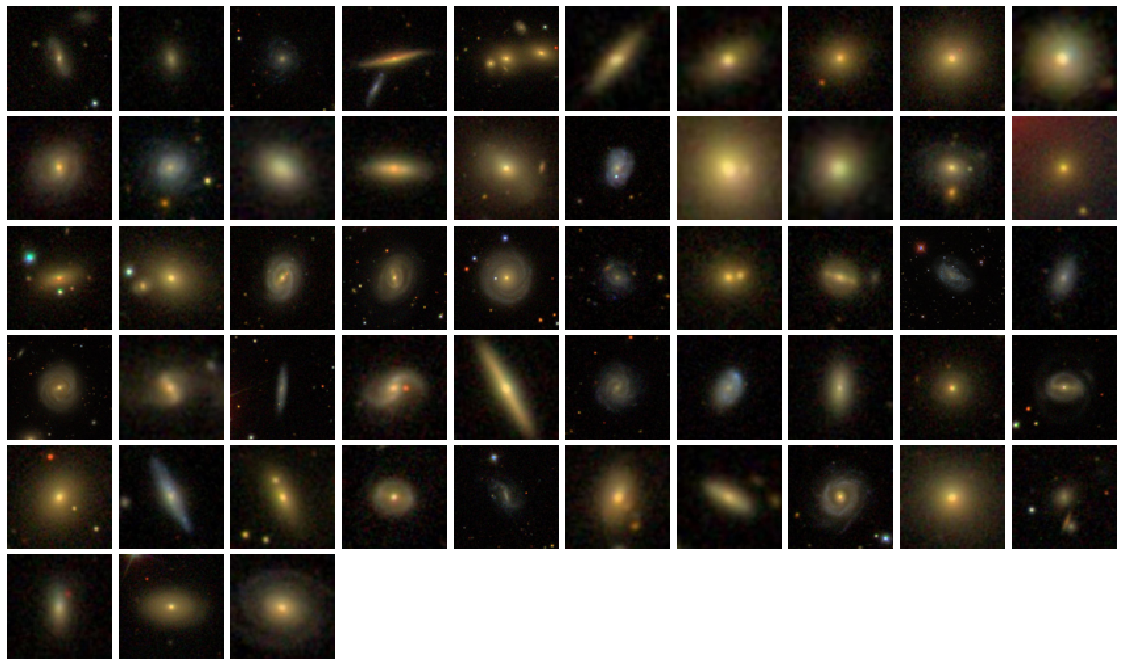

In [18]:
# Plotting exemplars for each of the clusters
cluster_evaluate.plot_cluster(x[aff_prop.cluster_centers_indices_]) ;

### Saving cluster labels to file

In [19]:
label_path = './cluster_tags/'
np.save(label_path + 'affinity_propagation-' + str(np.max(aff_prop_labels)) + '_CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) + '.npy', 
        aff_prop_labels)
